# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#Importing Data
df = pd.read_csv(os.path.join(r'C:\Users\iNDIA\Desktop\Career Foundry\6 Advanced Analytics & Dashboard Design\6.1 Sourcing Open Data\World Happiness Report\happiness_report.csv'))

In [4]:
df.head()

,Unnamed: 0,Country name,Country Code,Regional Indicator,year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,Afghanistan,AFG,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,1,Afghanistan,AFG,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,2,Afghanistan,AFG,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,3,Afghanistan,AFG,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,4,Afghanistan,AFG,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


### Wrangling Data

In [5]:
# Dropping Column Unnamed: 0
df = df.drop(columns = ['Unnamed: 0'])

In [6]:
df.head()

,Country name,Country Code,Regional Indicator,year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,AFG,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,AFG,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,AFG,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,AFG,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,AFG,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [7]:
df.shape

(2128, 11)

#### Checking Missing Data

In [8]:
df.isnull().sum()

Country name                          0
Country Code                          0
Regional Indicator                    0
year                                  0
Happiness Score                       0
Log GDP per capita                   35
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         27
Generosity                           55
Perceptions of corruption           102
dtype: int64

Adding "median" to these missing values

In [9]:
df.median()

C:\Users\iNDIA\AppData\Local\Temp/ipykernel_12092/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


year                                2015.0000
Happiness Score                        5.4185
Log GDP per capita                     9.3770
Social support                         0.8360
Healthy life expectancy at birth      64.9000
Freedom to make life choices           0.7530
Generosity                            -0.0130
Perceptions of corruption              0.7890
dtype: float64

In [10]:
df['Log GDP per capita'].fillna(9.3770, inplace = True)

In [11]:
df.isnull().sum()

Country name                          0
Country Code                          0
Regional Indicator                    0
year                                  0
Happiness Score                       0
Log GDP per capita                    0
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         27
Generosity                           55
Perceptions of corruption           102
dtype: int64

In [13]:
df['Social support'].fillna(0.8360, inplace = True)

In [14]:
df['Healthy life expectancy at birth'].fillna(64.9000, inplace = True)

In [15]:
df['Freedom to make life choices'].fillna(0.7530, inplace = True)

In [16]:
df['Generosity'].fillna(-0.0130, inplace = True)

In [17]:
df['Perceptions of corruption'].fillna(0.7890, inplace = True)

In [18]:
df.isnull().sum()

Country name                        0
Country Code                        0
Regional Indicator                  0
year                                0
Happiness Score                     0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
dtype: int64

In [19]:
#Exporting this dataset
df.to_csv(os.path.join(r'C:\Users\iNDIA\Desktop\Career Foundry\6 Advanced Analytics & Dashboard Design\6.1 Sourcing Open Data\World Happiness Report', 'WHR.csv'))

#### Data Cleaning
Not required, as the data is from a reliable source only and all the missing values have already been filled up

### Extreme Values check

C:\Users\iNDIA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

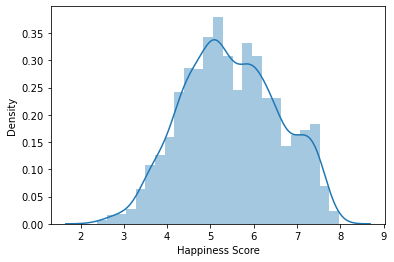

In [20]:
#Checking for Happiness Score

sns.distplot(df['Happiness Score'], bins = 25)

There are no extreme values for the Happiness Scores

C:\Users\iNDIA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Social support', ylabel='Density'>

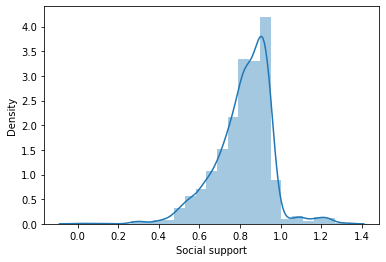

In [21]:
#Checking for Social support

sns.distplot(df['Social support'], bins = 25)

### 3. Data Prep for regression analysis

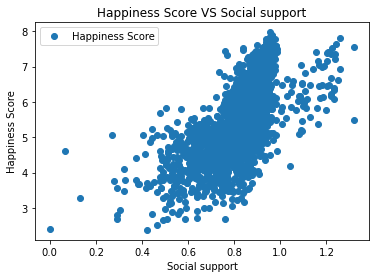

In [29]:
# Create a plot using matplotlib for another look at how the
# chosen variables plot against each other

df.plot(y= 'Happiness Score', x= 'Social support', style = 'o') 
plt.title('Happiness Score VS Social support')
plt.ylabel ('Happiness Score')
plt.xlabel ('Social support')
plt.show()

In [30]:
# Reshape the variables into NumPy arrays and put them into separate objects

y = df['Happiness Score'].values.reshape(-1,1)
X = df['Social support'].values.reshape(-1,1)

# Happiness Score is a dependant variable (y), being dependant on independent variable of Social Support (X)

In [31]:
X

array([[0.451],
       [0.552],
       [0.539],
       ...,
       [0.717],
       [0.75 ],
       [0.69 ]])

In [32]:
y

array([[3.724],
       [4.402],
       [4.758],
       ...,
       [3.16 ],
       [3.145],
       [2.995]])

In [33]:
# Split data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Regression Analysis

In [34]:
regression = LinearRegression()

In [35]:
# Create a regression object

regression = LinearRegression() 
#this is the regression object we will fit into the training set

In [36]:
#Fit the regression to the train set

regression.fit(X_train, y_train)

LinearRegression()

In [37]:
#predicting the values of y using x

y_predicted = regression.predict(X_test)

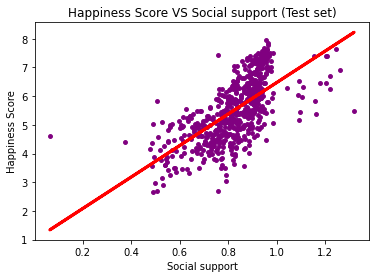

In [44]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color ='purple', s=15)
plot_test.plot(X_test,y_predicted,color = 'red', linewidth =3)
plot_test.title('Happiness Score VS Social support (Test set)')
plot_test.xlabel('Social support')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [45]:
# Create objects that contain model summary statistics

rmse = mean_squared_error(y_test, y_predicted) #This is the mean squared error
r2 = r2_score(y_test, y_predicted) #This is R2 score

In [46]:
# Print the model summary statistics
# To evaluate model performance

print('Slope:', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.49261114]]
Mean squared error:  0.6577842346232691
R2 score:  0.42863910165944485


The positive slope value of 5.49 indicates that as the value of X (i.e. Social support) increases the Happiness Score also increases

A very small MSE (Mean squared error) value of 0.65 here indicates that the regression line passes very closely to the observation and provides good representation to the data

R2 score of 0.42 though predicts that the model isn't a good fit. So for the sake of our study, we will do another check manually. 

In [47]:
y_predicted

array([[5.41095948],
       [5.36152598],
       [4.56509736],
       [5.10886586],
       [5.46039298],
       [5.53728953],
       [5.7679792 ],
       [5.38349642],
       [5.56475259],
       [6.13049154],
       [5.20773287],
       [5.6196787 ],
       [6.12499893],
       [5.87783142],
       [6.04810237],
       [5.8174127 ],
       [5.9162797 ],
       [5.35054075],
       [5.45490037],
       [6.22935854],
       [6.13598415],
       [5.6691122 ],
       [6.04810237],
       [6.05908759],
       [5.71305309],
       [5.64714176],
       [6.0151467 ],
       [5.93825015],
       [6.11950631],
       [4.85620575],
       [6.21837331],
       [5.92177231],
       [5.97669842],
       [5.80642748],
       [5.28462942],
       [5.24618114],
       [6.22935854],
       [4.73536831],
       [6.9983241 ],
       [6.10852109],
       [4.86169836],
       [6.03711715],
       [4.69142742],
       [6.05908759],
       [5.90529448],
       [5.92726492],
       [6.0645802 ],
       [5.053

In [48]:
# Create a dataframe comparing the real and the predicted values of y

data = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.934,5.410959
1,5.930,5.361526
2,4.090,4.565097
3,4.725,5.108866
4,4.213,5.460393
5,3.993,5.537290
6,5.463,5.767979
7,5.074,5.383496
8,6.536,5.564753
9,6.676,6.130492


#### Comparing how the regression fits the training set

In [51]:
# Predict

y_predicted_train = regression.predict(X_train)
# This is predicting X_train

In [52]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [53]:
print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[5.49261114]]
Mean squared error:  0.6656742676624555
R2 score:  0.4699613960963598


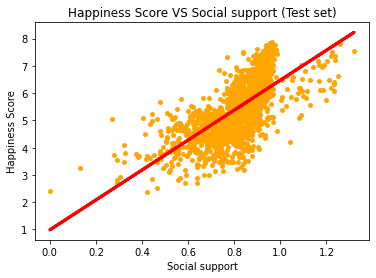

In [56]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color ='orange', s=15)
plot_test.plot(X_train,y_predicted_train,color = 'red', linewidth =3)
plot_test.title('Happiness Score VS Social support (Test set)')
plot_test.xlabel('Social support')
plot_test.ylabel('Happiness Score')
plot_test.show()

The model with the help of slope shows a country with the high social support will have a high happiness score and same goes out for the rms score as well, but w.r.t r2 score is concerned it shows that the model is not a good fit. The r2 value slightly increased for the training data set though, but still it appears to be a less of a good fit. For this, we will have to try other test methods as well